In [2]:
# code to anonymize my data by removing each email and name and 
# replacing it with a unique identifier

import pandas as pd

In [3]:
df_fall = pd.read_csv('AdvancedPandasTutorial.csv',low_memory=False)

In [6]:
df_fall.columns

Index(['answer_given', 'assessment', 'completed', 'confidence_level',
       'correct', 'duration', 'email', 'launch_referrer', 'name',
       'navigation_method', 'newTime', 'object', 'objectid', 'oldTime',
       'playRate', 'playerTime', 'question_type', 'score', 'timestamp', 'verb',
       'videoID', 'videoName', 'volume'],
      dtype='object')

In [5]:
df_fall['verb'].value_counts()

watched             147338
answered             56211
attempted            38037
played               30108
suspended            21701
paused               19257
jumped               15482
started              12143
ended                 8729
launched              6882
completed             4883
showed_answer         4732
changed_playrate      3674
clicked               3184
showed_hint           2476
minimized             1843
changed_volume         481
exited                 377
Name: verb, dtype: int64

In [7]:
#look at everyone's given ids
df_fall.name.value_counts()

90     7288
3      7270
10     6498
57     6429
198    6350
25     5642
17     5157
145    5156
19     4997
84     4911
65     4780
1      4608
50     4599
23     4483
42     4377
0      4312
104    4300
70     4286
96     4234
41     4188
2      4183
7      4137
8      4125
56     4035
184    3980
15     3921
13     3790
22     3724
39     3583
162    3540
       ... 
93        4
44        4
48        4
71        4
9         3
40        3
115       3
105       3
97        3
117       3
12        3
73        3
123       2
118       2
125       2
153       2
36        2
116       2
92        2
87        2
72        2
113       2
102       1
81        1
130       1
131       1
136       1
142       1
151       1
146       1
Name: name, dtype: int64

In [23]:
#mean total videos played per student
##when verb is = to play
played = df_fall[df_fall['verb']=='played']
#groupby to collapse onto a specific student
played.groupby(['name']).count()['verb']

name
0       207
1       264
2       393
3       547
4        49
6        65
7       869
8       383
10      516
11       96
13      393
14      229
15      508
16      121
17      646
18      217
19      419
20      161
21      220
22      251
23      525
24      148
25      655
27      146
28      271
29       73
31       53
32      200
33      126
34       79
       ... 
182      75
184     413
185      27
186      29
188      16
189      96
190      31
191     165
192      68
194     177
195      34
197     215
198    1755
199       1
200      77
203       1
204     146
206      17
207      20
211     121
212      84
214      42
215      32
216     169
217      46
219     187
220      95
225      28
226     111
227      78
Name: verb, dtype: int64

In [25]:
#look at some histograms of the data
import matplotlib
%matplotlib inline

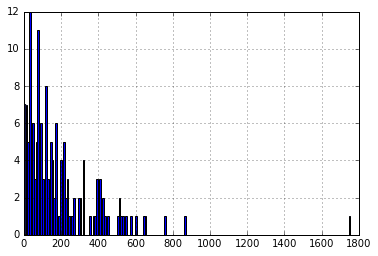

In [43]:
#histogram of average # of verbs per person
verbsPerPerson = played.groupby(['name']).count()['verb']
verbsPerPerson.hist(bins = 200)

(6.2192571051551395, 5.9402001728110605)

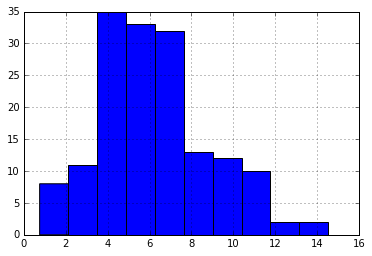

In [40]:
#get the total # of watched per play events per student
played = df_fall[df_fall['verb'] == 'played']
watched = df_fall[df_fall['verb'] == 'watched']
playedperstudent = played.groupby('name').count().verb
watchedperstudent = watched.groupby('name').count().verb
watched_played = (watchedperstudent/playedperstudent)
general = watched_played[watched_played < 16]
general.hist()
general.mean(), general.median()

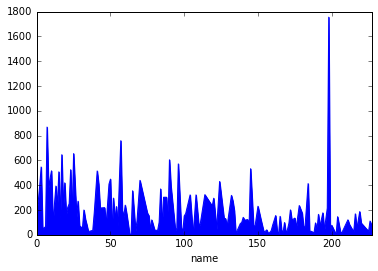

In [52]:
#have some fun with verbs per person
verbsPerPerson.plot(kind="area")

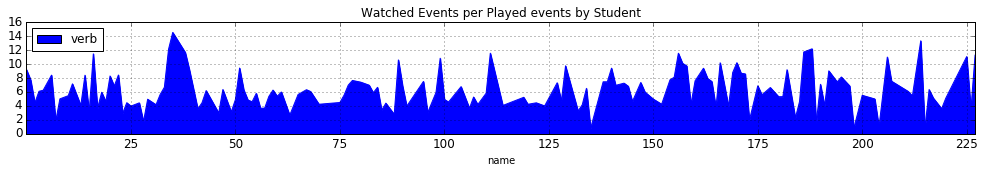

In [91]:
general.plot(kind="area", fontsize = 12,grid = True,figsize=(17,2),legend=True,title = "Watched Events per Played events by Student", xticks = [25, 50, 75, 100, 125, 150, 175, 200, 225])